In [1]:
#!pip install investiny
#!pip install --upgrade ta
#!pip install investpy
#!python -m pip install trendet --upgrade


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('seaborn')

In [3]:
from investiny import search_assets

results = search_assets(query = "HTMX11", type = "Stock")

In [4]:
print(results)

[{'symbol': 'HTMX11', 'full_name': 'BM&FBovespa:HTMX11', 'description': 'FII Hotel Maxinvest', 'type': 'Stock', 'ticker': '986569', 'exchange': 'BM&FBovespa'}]


In [5]:
from investiny import historical_data

data = historical_data(investing_id = 986569, from_date = '08/24/2016', to_date = '01/11/2022')

In [6]:
df = pd.DataFrame(data)

In [7]:
df.head()

,date,open,high,low,close,volume
0,08/24/2016,125.000000,125.000000,125.0,125.000000,0
1,08/25/2016,125.989998,125.989998,122.0,122.500000,2836
2,08/28/2016,123.000000,123.900002,122.5,123.110001,1022
3,08/29/2016,123.989998,125.500000,122.5,125.500000,2064
4,08/30/2016,125.500000,126.000000,123.5,125.500000,1925


In [8]:
from ta.volatility import BollingerBands
from ta.utils import dropna

#df = dropna(df)
indicator_bb = BollingerBands(close = df["close"], window = 30, window_dev = 2, fillna = True)

# Add Bollinger Bands features
df['bb_bbm'] = indicator_bb.bollinger_mavg()
df['bb_bbh'] = indicator_bb.bollinger_hband()
df['bb_bbl'] = indicator_bb.bollinger_lband()

# Add Width Size Bollinger Bands
df['bb_bbw'] = indicator_bb.bollinger_wband()

df['bb_bbp'] = indicator_bb.bollinger_pband()

In [9]:
df

,date,open,high,low,close,volume,bb_bbm,bb_bbh,bb_bbl,bb_bbw,bb_bbp
0,08/24/2016,125.000000,125.000000,125.000000,125.000000,0,125.000000,125.000000,125.000000,0.000000,0.000000
1,08/25/2016,125.989998,125.989998,122.000000,122.500000,2836,123.750000,126.250000,121.250000,4.040404,0.250000
2,08/28/2016,123.000000,123.900002,122.500000,123.110001,1022,123.536667,125.665224,121.408110,3.446033,0.399776
3,08/29/2016,123.989998,125.500000,122.500000,125.500000,2064,124.027500,126.535303,121.519698,4.043946,0.793584
4,08/30/2016,125.500000,126.000000,123.500000,125.500000,1925,124.322000,126.855563,121.788437,4.075808,0.732479
...,...,...,...,...,...,...,...,...,...,...,...
1325,01/05/2022,89.040001,90.500000,87.589996,90.010002,1844,88.053333,91.403685,84.702981,7.609825,0.792009
1326,01/06/2022,90.010002,90.050003,87.150002,87.570000,1803,88.105333,91.374660,84.836006,7.421405,0.418128
1327,01/09/2022,87.580002,90.000000,87.250000,87.500000,1616,88.106667,91.374972,84.838361,7.418974,0.407189
1328,01/10/2022,87.500000,87.940002,87.300003,87.300003,585,88.165000,91.308793,85.021207,7.131612,0.362428


In [10]:
df.shape

(1330, 11)

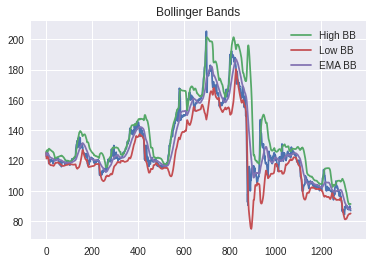

In [11]:
plt.plot(df.close)
plt.plot(df.bb_bbh, label='High BB')
plt.plot(df.bb_bbl, label='Low BB')
plt.plot(df.bb_bbm, label='EMA BB')
plt.title('Bollinger Bands')
plt.legend()
plt.show()

INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


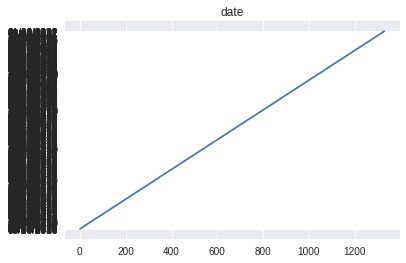

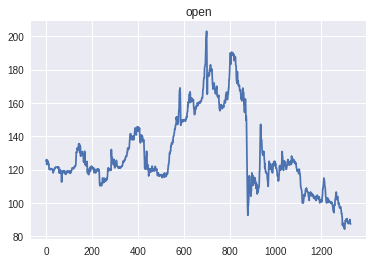

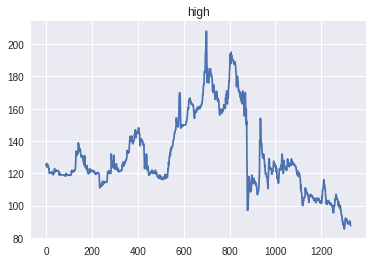

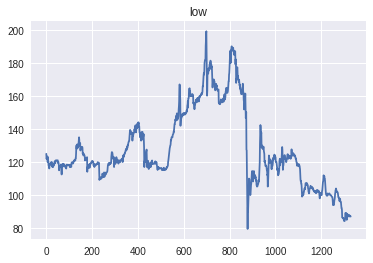

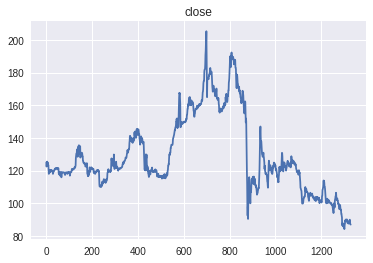

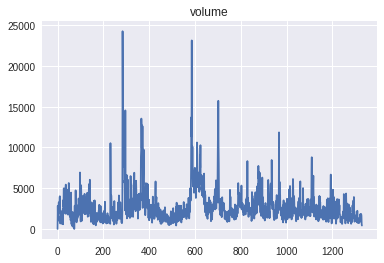

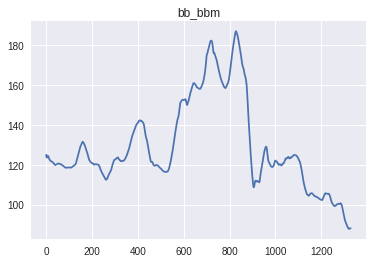

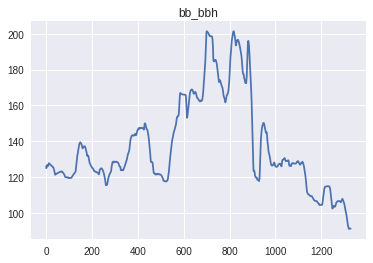

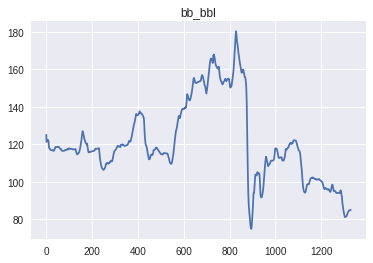

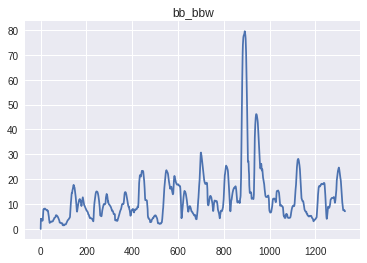

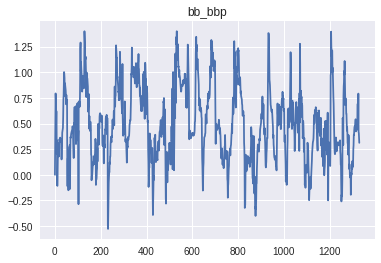

In [12]:
for col in df.columns:
    plt.plot(df[col])
    plt.title(col)
    plt.show()